In [38]:
from pathlib import Path
import pandas as pd
import numpy as np
from import_clean_data import load_annotated_meter_data
from matplotlib import pyplot as plt

In [2]:
DATA_DIR = (Path.cwd() / ".." / "Data").resolve()

In [8]:
meter = load_annotated_meter_data(DATA_DIR)

/Users/cmutel/miniconda3/envs/bw2dev38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/cmutel/miniconda3/envs/bw2dev38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/cmutel/Code/green_charging_emobility/Notebooks/import_clean_data.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meter_2["Chargepoint"][mask] = 42


In [9]:
meter['co2_total'] = meter['co2_total'] / 4 / 1000

In [10]:
meter

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,co2_intensity,co2_total
0,1057264,1,1,2188,155260,920,2021-01-01 00:15:00,163.543346,0.037615
1,978733,2,1,2190,2213880,0,2021-01-01 00:15:00,163.543346,0.000000
2,978738,3,1,2195,3081670,0,2021-01-01 00:15:00,163.543346,0.000000
3,978742,4,1,2194,1463670,0,2021-01-01 00:15:00,163.543346,0.000000
4,978746,5,1,1923,1836900,0,2021-01-01 00:15:00,163.543346,0.000000
...,...,...,...,...,...,...,...,...,...
315492,978722,25,1,2201,478370,0,2021-01-01 00:00:00,161.490000,0.000000
315493,978724,26,1,1965,252472,0,2021-01-01 00:00:00,161.490000,0.000000
315494,978728,28,1,2199,332544,1173,2021-01-01 00:00:00,161.490000,0.047357
315495,982914,29,1,2197,805520,0,2021-01-01 00:00:00,161.490000,0.000000


In [11]:
%matplotlib inline

In [13]:
meter = meter.astype({"Chargepoint": str, "connector": str})
meter['unique_charge_point'] = meter['Chargepoint'] + "|" + meter['connector']

In [ ]:
sum (co2_in * incre) / sum(incre)

In [30]:
meter['inc_times_intensity_raw'] = meter['increment'] * meter['co2_intensity']

In [31]:
aggregated = meter.groupby(by=['unique_charge_point']).sum(['inc_times_intensity_raw', 'increment'])

In [32]:
aggregated["weighted-avg"] = aggregated['inc_times_intensity_raw'] / aggregated['increment']

Text(0.5, 0, 'Average CO2 intensity (g CO2/kWh) per chargepoint')

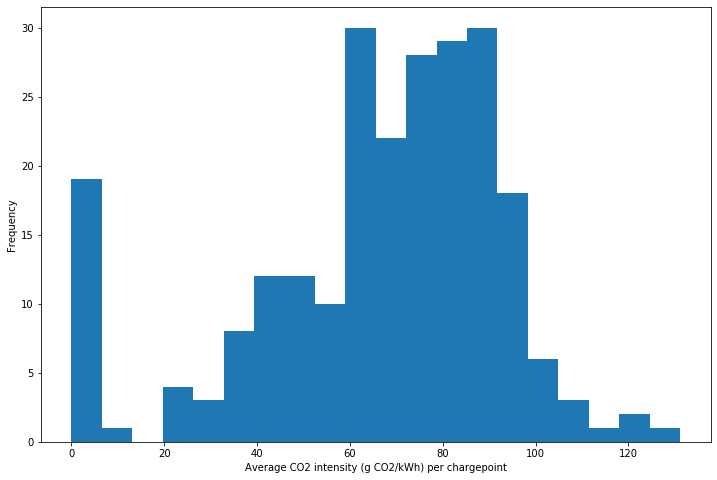

In [39]:
aggregated["weighted-avg"].plot.hist(bins=20, figsize=(12, 8))
plt.xlabel("Average CO2 intensity (g CO2/kWh) per chargepoint")

Text(0, 0.5, 'Total energy (Wh)')

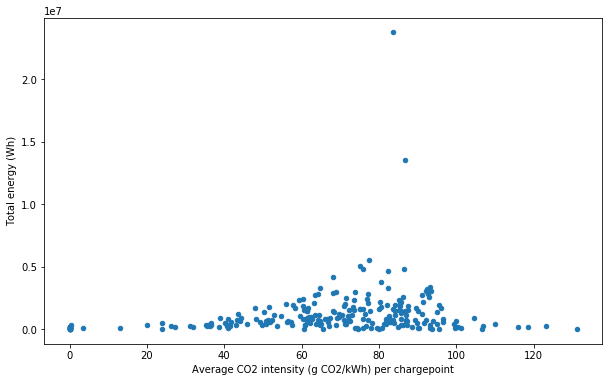

In [42]:
aggregated.plot.scatter(x='weighted-avg', y='increment', figsize=(10, 6))
plt.xlabel("Average CO2 intensity (g CO2/kWh) per chargepoint")
plt.ylabel("Total energy (Wh)")